# Sales Analysis using Pandas 

### Importing the libraries

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
import warnings

### Task 1: Merging 12 months of data into a single file


In [4]:
#read the path
cwd = os.path.abspath(r"C:\Users\rahil\Desktop\Rahil's Project\Pandas Project\pandas\Sales_Data")

In [5]:
# List all the files in the directory
file_list = [file for file in os.listdir(cwd) if file.endswith('.csv')]

In [6]:
# Create an empty DataFrame to store the concatenated data
df = pd.DataFrame()

In [7]:
# Concatenate all files in the list
for file in file_list:
    file_path = os.path.join(cwd, file)
    df_temp = pd.read_csv(file_path)
    df = pd.concat([df, df_temp], ignore_index=True)

C:\Users\rahil\AppData\Local\Temp\ipykernel_22860\4050727413.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path)


In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [9]:
# Specify the path for the combined CSV file
combined_csv_path = os.path.join(cwd, 'combined_sales_data.csv')

# Write the concatenated DataFrame to a CSV file
df.to_csv(combined_csv_path, index=False)

### Task 2: Data Cleaning

##### Drop NaN Columns

In [10]:
# Counting NaN values in all columns
df.isna().sum()


Order ID               4905
Product                4905
Quantity Ordered       4905
Price Each             4905
Order Date             4905
Purchase Address       4905
Month               1309040
dtype: int64

In [11]:
df = df.dropna()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [12]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

##### Drop 'Or' values

In [13]:
# Remove rows where 'Order Date' contains 'Or'
df = df[df['Order Date'] != 'Or']

### Augment data with additional columns

### Task 2: Add Month Column

In [14]:
# Extract the first two characters from 'Order Date' and convert to integer
df['Month'] = pd.to_numeric(df['Order Date'].str[0:2], errors='coerce')

# Optionally, drop rows with NaN (resulting from non-numeric or invalid values)
df = df.dropna(subset=['Month'])

# Convert 'Month' to int32 if needed
df['Month'] = df['Month'].astype('int32')


In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [16]:
# Check data types of relevant columns
print(df.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object


### Question 1: What was the best month for sales? How much was earned that month? 

In [17]:
# Convert 'Quantity Ordered' and 'Price Each' to numeric
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Multiply 'Order Quantity' by 'Price Each' to get total sales per order
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']

In [18]:
# Group by 'Month' and sum the total sales for each month
monthly_sales = df.groupby('Month')['Total Sales'].sum()

# Find the month with the highest total sales
best_month = monthly_sales.idxmax()

#Print the month
print(f"The best month for sales was {best_month} with total sales of {monthly_sales.max()}")

The best month for sales was 12 with total sales of 9226886.68


In [19]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
373696,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
373697,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [20]:
# Group by 'Month' and sum the total sales for each month
monthly_sales = df.groupby('Month').sum()

monthly_sales

,Quantity Ordered,Price Each,Total Sales
Month,,,
1,21806,3623536.76,3644513.46
2,26898,4377769.44,4404044.84
3,34010,5582415.66,5614200.76
4,41116,6735342.04,6781340.48
5,37334,6270250.26,6305213.50
6,30506,5124051.22,5155604.52
7,32144,5265079.12,5295551.52
8,26896,4460690.84,4488935.76
9,26218,4169984.18,4195120.26


Note: Couple of things to be mentioned here, can give df['Month'] and others as my input as there are a lot of values but rather creating a range from 1-12 months

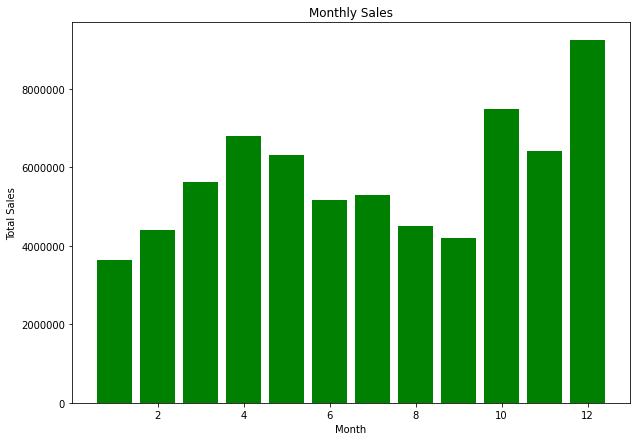

In [73]:
# Importing matplotlib for visualization 
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 7))

months = range(1,13)

plt.bar(months, monthly_sales['Total Sales'], color='green')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')

# Format y-axis tick labels to display entire values
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

### Question 2: What city has the highest number of Sales

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 2: Add a 'City' column

Here we're using .apply() function:

1) The apply function is used to apply a function along the axis of a DataFrame.

2) lambda x: x.split(', ')[1] is a lambda function that takes each value in the 'Purchase Address' column, splits it by ', ', and selects the element at index 1, which represents the city.

3) This effectively extracts the city information from each address and creates a new 'City' column in the DataFrame.

In [23]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(', ')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [24]:
# Group by 'City' and sum the total sales for each city
city_sales = df.groupby('City')['Total Sales'].sum()

# Find the city with the highest total sales
best_city = city_sales.idxmax()

print(f"The city with the highest sales is {best_city} with total sales of {city_sales.max()}")

The city with the highest sales is San Francisco with total sales of 16524407.82


In [25]:
# Group by 'City' and sum the total sales for each city
city_sales = df.groupby('City').sum()
city_sales

,Quantity Ordered,Price Each,Month,Total Sales
City,,,,
Atlanta,33204,5559816.40,209588,5590997.16
Austin,22306,3619747.22,139658,3639163.50
Boston,45056,7274819.54,282224,7323284.02
Dallas,33460,5505255.64,209240,5535950.80
Los Angeles,66578,10842870.46,416650,10905141.60
New York City,55864,9270741.66,351482,9328634.86
Portland,28106,4615494.94,175530,4640981.22
San Francisco,100478,16422923.48,631040,16524407.82
Seattle,33106,5466592.02,209882,5495510.96


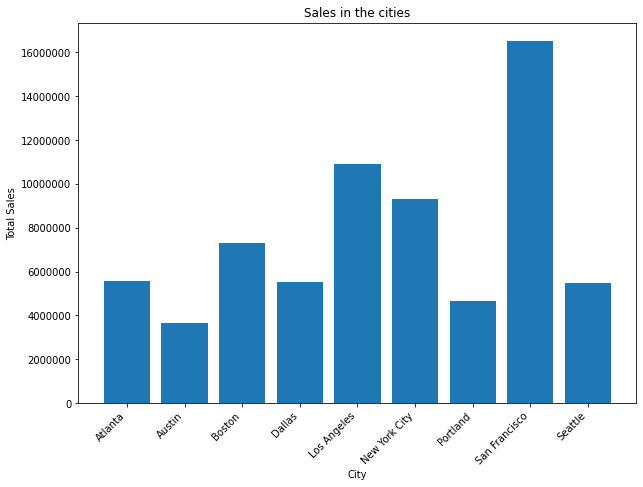

In [70]:
# Importing matplotlib for visualization 
import matplotlib.pyplot as plt

city = [city for city, df in df.groupby('City')]


fig, ax = plt.subplots(figsize=(10, 7))
plt.bar(city, city_sales['Total Sales'])

# Add labels and title
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Sales in the cities')

# Format y-axis tick labels to display entire values
plt.ticklabel_format(style='plain', axis='y')

#Format x-axis tick labels to display entire vales
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [31]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [33]:
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [36]:
hour_distribution = df['Hour'].value_counts()

# Find the hour(s) with the highest frequency
peak_hours = hour_distribution.idxmax()

print(f"The peak hour for showing advertisements is {peak_hours}")


The peak hour for showing advertisements is 19


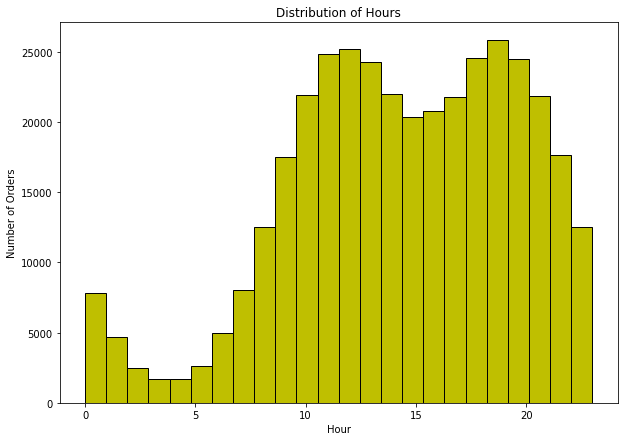

In [68]:
# Plotting a Histogram
fig, ax = plt.subplots(figsize=(10, 7))
plt.hist(df['Hour'], bins=24, edgecolor='black', color='y')  
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Distribution of Hours')
plt.show()


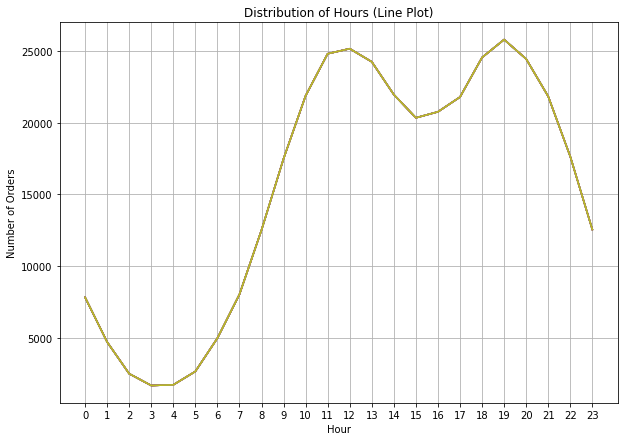

In [63]:
hours = [hour for hour, df in df.groupby('Hour')]

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(hours, df.groupby(['Hour']).count())
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Distribution of Hours (Line Plot)')
plt.xticks(hours)
plt.grid(True)  # Optionally add a grid for better readability
plt.show()


In [52]:
hour_sales = df.groupby('Hour').sum()
hour_sales

,Quantity Ordered,Price Each,Month,Total Sales
Hour,,,,
0,8856,1418593.40,55108,1427442.54
1,5238,916980.00,33314,921733.76
2,2796,467667.28,17014,469702.88
3,1856,289452.84,11808,291515.78
4,1874,324116.36,12296,325322.02
5,2986,459242.42,18602,461359.64
6,5620,890000.22,35078,896226.00
7,9112,1481136.22,57700,1489708.24
8,14004,2371941.24,87252,2384697.94


### Question 4: What product is sold the most?

In [53]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [56]:
# Group by product and calculate total sales
product_stats = df.groupby('Product')['Total Sales'].sum().reset_index()
product_stats.head()

,Product,Total Sales
0,20in Monitor,908297.42
1,27in 4K Gaming Monitor,4870195.12
2,27in FHD Monitor,2264849.00
3,34in Ultrawide Monitor,4711116.02
4,AA Batteries (4-pack),212236.80


In [58]:
# Sort products by total sales in descending order
sorted_products_by_sales = product_stats.sort_values(by='Total Sales', ascending=False)
sorted_products_by_sales

,Product,Total Sales
13,Macbook Pro Laptop,16075200.00
18,iPhone,9588600.00
14,ThinkPad Laptop,8259917.40
9,Google Phone,6638400.00
1,27in 4K Gaming Monitor,4870195.12
3,34in Ultrawide Monitor,4711116.02
6,Apple Airpods Headphones,4698300.00
8,Flatscreen TV,2891400.00
7,Bose SoundSport Headphones,2691130.86
2,27in FHD Monitor,2264849.00


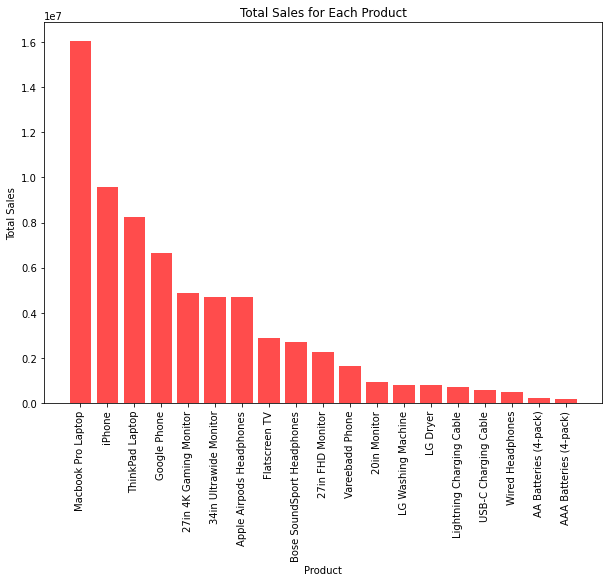

In [62]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 7))
plt.bar(sorted_products_by_sales['Product'], sorted_products_by_sales['Total Sales'], color='r', alpha=0.7)
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Product')
plt.xticks(rotation=90)
plt.show()